# Project Statement:
### Portobello Tech is an app innovator who has devised an intelligent way of predicting employee turnover within the company. It periodically evaluates employees' work details, including the number of projects they worked on, average monthly working hours, time spent in the company, promotions in the last five years, and salary level.
### Data from prior evaluations shows the employees’ satisfaction in the workplace. The data could be used to identify patterns in work style and their interest in continuing to work for the company.
### The HR Department owns the data and uses it to predict employee turnover. Employee turnover refers to the total number of workers who leave a company over time.
### As the ML Developer assigned to the HR Department, we have been asked to create ML programs to:
### 1. Perform data quality checks by checking for missing values, if any.
### 2. Understand what factors contributed most to employee turnover at EDA.
### 3. Perform clustering of employees who left based on their satisfaction and evaluation.
### 4. Handle the left Class Imbalance using the SMOTE technique.
### 5. Perform k-fold cross-validation model training and evaluate performance.
### 6. Identify the best model and justify the evaluation metrics used.
### 7. Suggest various retention strategies for targeted employees.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

### Load data into a data frame and check firtst 5 rows

In [26]:
# open hr_comma_sep.csv
df = pd.read_csv('hr_comma_sep.csv')

# check head of the data
print(df.head())


   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                   3              0     1                      0  sales   
1                   6              0     1                      0  sales   
2                   4              0     1                      0  sales   
3                   5              0     1                      0  sales   
4                   3              0     1                      0  sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4 

### It appears that there are 10 columns in the dataset and the 9th column is wrongly labeld as 'sales' whereas it appears to hold the value of the 'department' to which the employee belongs

In [27]:
# check the unique value of the 'sales' column
print(df['sales'].unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']


### We will change the 'sales' column name to 'department

In [28]:
# Change the name of the column 'sales' to 'department'
df.rename(columns = {'sales':'department'}, inplace = True)

# print column names
print(df.columns)

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')


### Print information about the data frame to identify any missing values or other anomalies

In [29]:
# check info of the data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None


### It does not appear that any of the columns in our data set have missing values
### We will now check for unique values for our 10 columns


In [31]:
# Check the unique values for each of the 10 columns in the data
for col in df.columns:
    print(col, df[col].unique())
    print()

satisfaction_level [0.38 0.8  0.11 0.72 0.37 0.41 0.1  0.92 0.89 0.42 0.45 0.84 0.36 0.78
 0.76 0.09 0.46 0.4  0.82 0.87 0.57 0.43 0.13 0.44 0.39 0.85 0.81 0.9
 0.74 0.79 0.17 0.24 0.91 0.71 0.86 0.14 0.75 0.7  0.31 0.73 0.83 0.32
 0.54 0.27 0.77 0.88 0.48 0.19 0.6  0.12 0.61 0.33 0.56 0.47 0.28 0.55
 0.53 0.59 0.66 0.25 0.34 0.58 0.51 0.35 0.64 0.5  0.23 0.15 0.49 0.3
 0.63 0.21 0.62 0.29 0.2  0.16 0.65 0.68 0.67 0.22 0.26 0.99 0.98 1.
 0.52 0.93 0.97 0.69 0.94 0.96 0.18 0.95]

last_evaluation [0.53 0.86 0.88 0.87 0.52 0.5  0.77 0.85 1.   0.54 0.81 0.92 0.55 0.56
 0.47 0.99 0.51 0.89 0.83 0.95 0.57 0.49 0.46 0.62 0.94 0.48 0.8  0.74
 0.7  0.78 0.91 0.93 0.98 0.97 0.79 0.59 0.84 0.45 0.96 0.68 0.82 0.9
 0.71 0.6  0.65 0.58 0.72 0.67 0.75 0.73 0.63 0.61 0.76 0.66 0.69 0.37
 0.64 0.39 0.41 0.43 0.44 0.36 0.38 0.4  0.42]

number_project [2 5 7 6 4 3]

average_montly_hours [157 262 272 223 159 153 247 259 224 142 135 305 234 148 137 143 160 255
 282 147 304 139 158 242 239 128 132 294 134 

### We will now describe the data in the numerical columns

In [32]:
# Desicribe numerical columns
print(df.describe())

       satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.

### Create a pair plot to visualize relationship bettween features

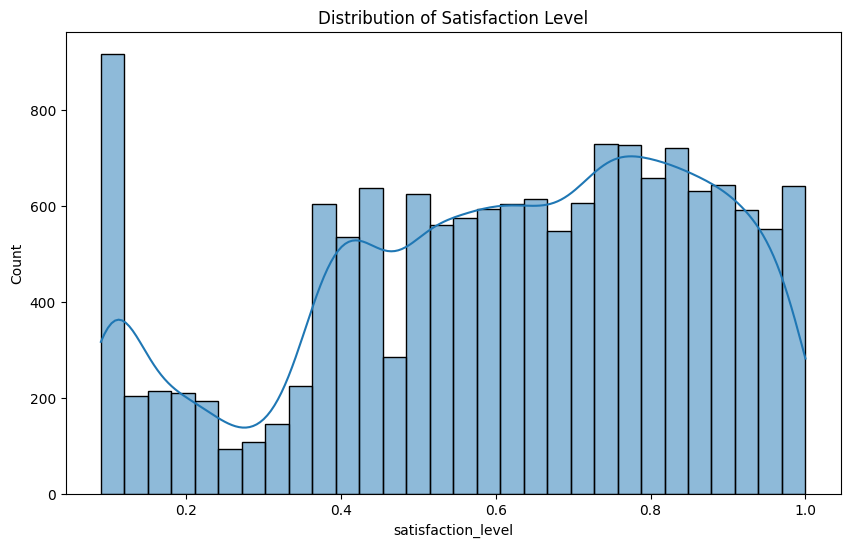

In [34]:
### Plot the distribution of the numerical columns
# plot satisfaction_level
plt.figure(figsize=(10,6))
sns.histplot(df['satisfaction_level'], kde=True)
plt.title('Distribution of Satisfaction Level')
plt.show()


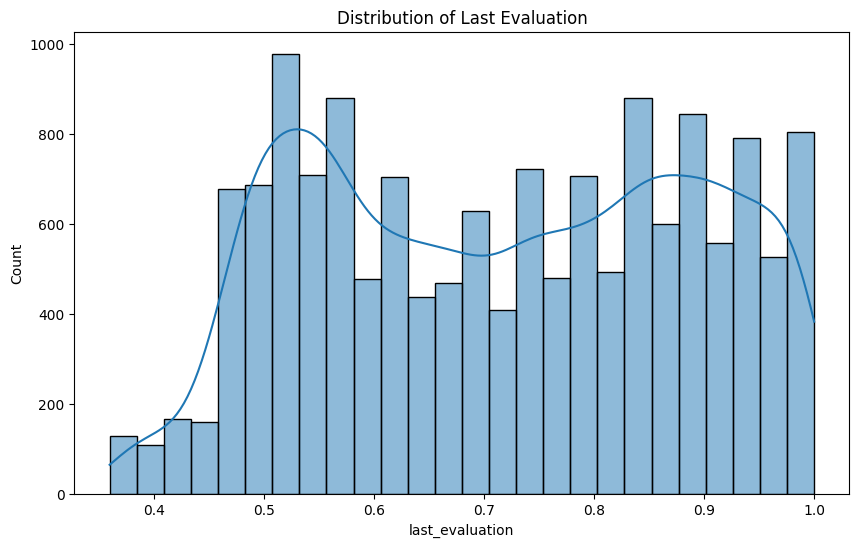

In [35]:
# plot last_evaluation
plt.figure(figsize=(10,6))
sns.histplot(df['last_evaluation'], kde=True)
plt.title('Distribution of Last Evaluation')
plt.show()

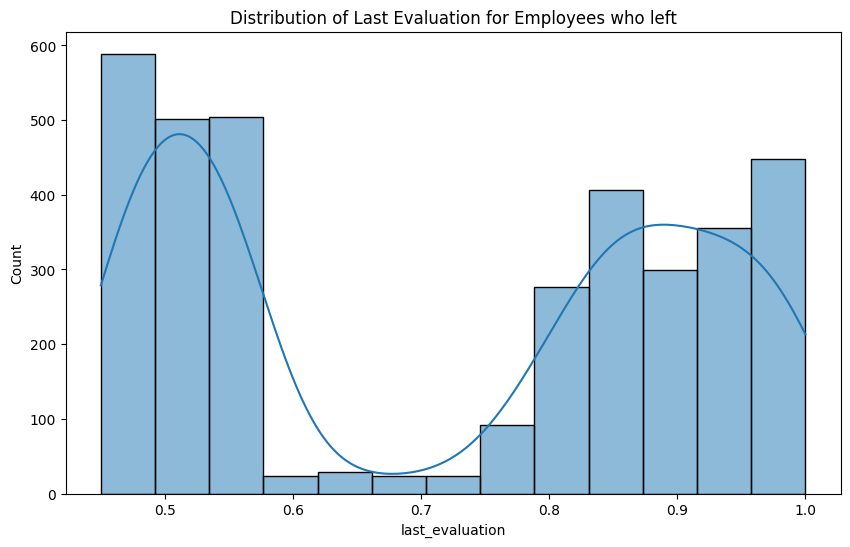

3571


In [38]:
# plot how many left company for each last_evaluation score
plt.figure(figsize=(10,6))
sns.histplot(df[df['left']==1]['last_evaluation'], kde=True)
plt.title('Distribution of Last Evaluation for Employees who left')
plt.show()
# print how many employees left company in total
print(df['left'].sum())

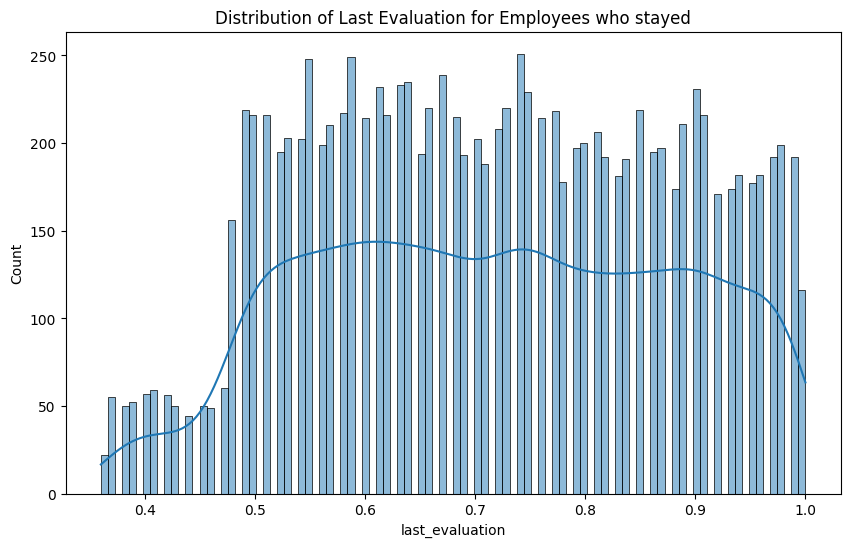

In [44]:
# Plot how many stayed for each last_evaluation score
plt.figure(figsize=(10,6))
sns.histplot(df[df['left']==0]['last_evaluation'], kde=True, bins=100)
plt.title('Distribution of Last Evaluation for Employees who stayed')
plt.show()
